# Multiple Linear Regression
The data (X1, X2, X3, X4, X5, X6, X7) are for each city.

X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_df = pd.read_csv("../week_13/crime_data.csv")
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<AxesSubplot:>

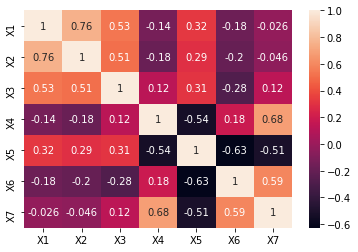

In [3]:
#multiple linear regression - needs to use variables that are uncorrelated with each other
correlation = crime_df.corr()
sns.heatmap(correlation,annot=True)

In [5]:
X = crime_df[['X2','X3']]
y=crime_df['X1']

In [6]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

In [10]:
y_pred = regression.predict(X)
accuracy_score = regression.score(X,y)
print(accuracy_score)

0.6018291029793748


In [11]:
#what do the coefficients tell you? 
regression.coef_

array([0.33546729, 4.24696246])

In [ ]:
#Would we try to predict X1 based on X2 and X3?
#values are somewhat correlated

#what is the equation for our model? 
#X1=.335X2 + 4.25X3


# Fancy Linear Regression

Ordinary least squares (OLS) is a type of linear regression that allows you to estimate a dependent variable in a linear regression model. It lets you look at interactions between features and can be quite complex.

In [4]:
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv("../week_13/diabetes.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
diabetes_vs_age = ols("Outcome ~ Age", data=diabetes_df).fit()
print(diabetes_vs_age.params)
intercept, slope = diabetes_vs_age.params

Intercept    0.027624
Age          0.009667
dtype: float64


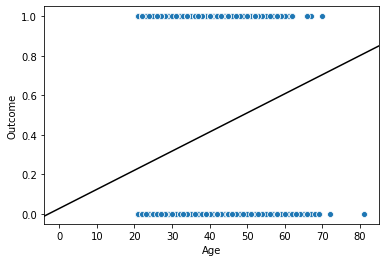

In [23]:
#Outcome=0.027624+0.009667∗Age
sns.scatterplot(x="Age",                
                y="Outcome",                
                data=diabetes_df)
plt.axline(xy1=(0,intercept),slope=slope,color="black")

# Logistic Regression 

In [30]:
#use logit 
from statsmodels.formula.api import logit
#no interaction
age_gl_no_int=logit("Outcome ~ Age + Glucose", data=diabetes_df).fit()
print(age_gl_no_int.params)

#interaction
age_gl_int=logit("Outcome ~ Age * Glucose", data=diabetes_df).fit()
print(age_gl_int.params)

Optimization terminated successfully.
         Current function value: 0.519116
         Iterations 6
Intercept   -5.912449
Age          0.024778
Glucose      0.035644
dtype: float64
Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [39]:
#Simplest logistic regression approach
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted = clf.predict(X_test)

In [40]:
clf.score(X,y)

0.3489583333333333

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [42]:
conf_matrix = confusion_matrix(y_test, y_predicted)

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', '0'), (0.0, 0.0, 0.6461200491051238, 0.8172757475083056)),
              (('0', '1'),
               (0.0,
                0.8205980066445181,
                0.6461200491051238,
                0.17940199335548176)),
              (('1', '0'),
               (0.6510951734832332,
                0.0,
                0.34890482651676685,
                0.4983388704318937)),
              (('1', '1'),
               (0.6510951734832332,
                0.5016611295681063,
                0.34890482651676685,
                0.4983388704318937))]))

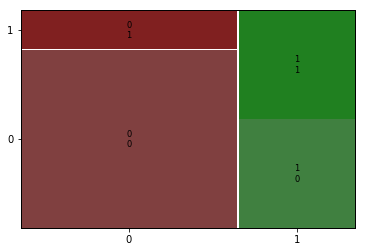

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)